In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(8,6)})
from matplotlib import pyplot as plt

df_raw = pd.read_csv('merged_32k.csv')

def dropped_nan_views(df):
    columns = [str(monthno) for monthno in range(1, 13)]
    return df.dropna(axis=0, subset=columns)

df = dropped_nan_views(df_raw).copy()
print(f"Went from {len(df_raw)} to {len(df)} rows after dropping nans.")

df.head()

Went from 32480 to 30882 rows after dropping nans.


,page_id,page_title,page_random,pp_propname,gap,1,2,3,4,5,6,7,8,9,10,11,12,total
0,28448998,"Korita,_Tomislavgrad",0.500000,NaN,NaN,6.0,0.0,3.0,1.0,12.0,1.0,4.0,4.0,3.0,6.0,12.0,7.0,59
1,31575239,Larry_Douglas_(American_football),0.500000,NaN,2.776510e-07,35.0,32.0,20.0,21.0,25.0,27.0,20.0,31.0,13.0,35.0,39.0,35.0,333
2,4404980,Nine_Mile_Road,0.500000,disambiguation,NaN,55.0,44.0,65.0,60.0,48.0,69.0,66.0,53.0,49.0,83.0,68.0,52.0,712
3,4895341,MSN_Chat,0.500001,NaN,1.651280e-07,1462.0,988.0,1251.0,793.0,748.0,738.0,695.0,726.0,773.0,829.0,519.0,634.0,10156
4,30992386,NAMA_(gene),0.500001,NaN,3.481600e-08,8.0,5.0,14.0,2.0,3.0,11.0,5.0,5.0,11.0,6.0,18.0,7.0,95


In [2]:
# Nvm, no 0s to deal with after dropping nans
#df['totalplus'] = df['total'] + 1
df['dab'] = df['pp_propname'] == 'disambiguation'
# Sub-frame for non-disambiguation pages
nd = df[~df.dab]

In [3]:
df.total.describe()

count    3.088200e+04
mean     1.254067e+04
std      7.662463e+04
min      3.000000e+00
25%      1.990000e+02
50%      7.320000e+02
75%      3.461000e+03
max      4.525873e+06
Name: total, dtype: float64

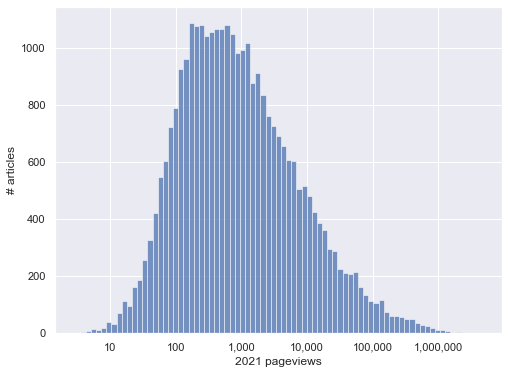

In [7]:
from matplotlib import ticker
import os

ax = sns.histplot(data=df, x='total', log_scale=True)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel("2021 pageviews")
ax.set_ylabel("# articles")
#ax.set_title("Distribution of pageviews for random sample of 32k articles")
img_dir = "/home/colin/src/colinmorris.github.com/assets/wiki-floor/"
def savefig(fname, dpi=144):
    path = os.path.join(img_dir, fname)
    plt.savefig(path, bbox_inches='tight', dpi=dpi)
    
savefig("32k_pageview_distribution.png")

In [70]:
print(f"{len(df[df.total < 10])} pages with < 10 views. {len(nd[nd.total < 10])} non-dabs.")
df.sort_values(by='total').head(50)

70 pages with < 10 views. 8 non-dabs.


,page_id,page_title,page_random,pp_propname,gap,1,2,3,4,5,6,7,8,9,10,11,12,total,dab
4503,41629959,Weimer_Township,0.500702,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3,True
23481,35904444,Goleh-ye_Cheshmeh,0.503623,disambiguation,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,True
26855,62309280,Governor_Terry,0.504145,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4,True
15491,34571617,Dom_Darreh,0.502386,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4,True
1295,41903849,Eslamabad-e_Pain,0.500197,disambiguation,NaN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,True
13673,30167321,Symphony_in_A,0.502107,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5,True
10350,34219005,Khvoshnam,0.501583,disambiguation,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5,True
31945,40446200,Koli-ye_Olya,0.504918,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,5,True
17337,44172578,Robert_Macgeorge,0.502664,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5,True
8769,39221085,Sar_Asiab-e_Farsangi,0.501337,disambiguation,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5,True


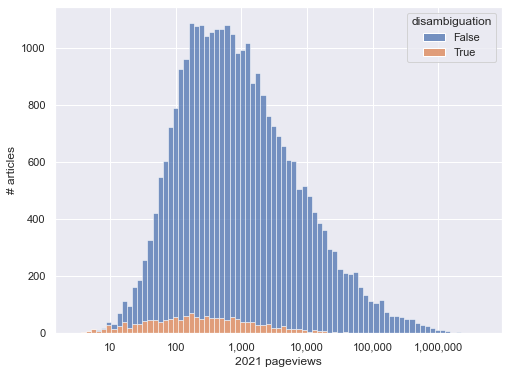

In [4]:
# Haack blah blah
qf = df.copy()
qf['disambiguation'] = qf['dab']
ax = sns.histplot(data=qf, x='total', log_scale=True, hue='disambiguation', multiple="stack");
ax.set_xlabel("2021 pageviews")
ax.set_ylabel("# articles")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
savefig("32k_pageview_distribution_split.png")

In [73]:
nd.sort_values(by='total').head(12)

,page_id,page_title,page_random,pp_propname,gap,1,2,3,4,5,6,7,8,9,10,11,12,total,dab
7250,43000144,Henderson_Constituency,0.501102,NaN,5.767700e-08,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,7,False
4944,45302000,Erygia_sigillata,0.500765,NaN,3.463000e-09,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,8,False
5588,61636665,Hilarigona_obscurata,0.500858,NaN,9.462000e-09,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8,False
24582,43631456,Loxocrambus_hospition,0.503792,NaN,7.511000e-09,1.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,9,False
18741,39775848,Makhoshin,0.502888,NaN,4.255000e-09,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,9,False
12369,47650275,Bojerud,0.501899,NaN,8.208000e-09,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,9,False
13183,12473958,Iranian_ground_jay,0.502029,NaN,4.449100e-08,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,9,False
12665,47715180,Scrobipalpula_crustaria,0.501948,NaN,2.300500e-08,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0,9,False
2427,53477493,Glenea_griseolineata,0.500381,NaN,9.007000e-09,0.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,10,False
21199,51273199,Cephalodina_crassiceps,0.503274,NaN,8.260000e-09,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,10,False


In [74]:
sum([3e-9, 9e-9, 8e-9, 4e-9, 8e-9, 2e-8])/6

8.666666666666667e-09

In [44]:
ax.get_ylim()

(-226293.65000000002, 4752166.65)

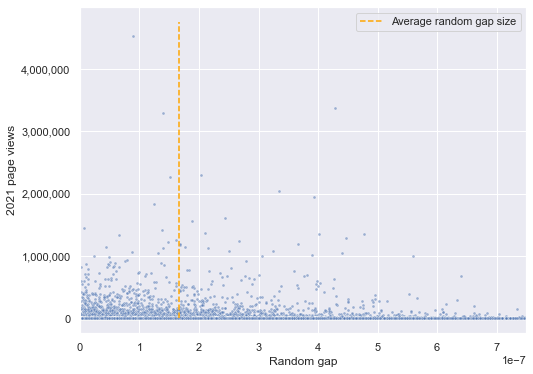

In [13]:
fig, ax = plt.subplots()
#ax.set_yscale('log')
sns.scatterplot(data=df, x='gap', y='total', alpha=.5, ax=ax, marker='.')
#ax.set_ylim(0, 200)
#ax.set_ylim(0, 100000)
ax.set_xlim(0, 
            #1e-6,
            7.5e-7,
           )
ax.vlines(1.67e-7, 0, ax.get_ylim()[1], label="Average random gap size", color='orange', linestyles='--')
plt.legend()
ax.set_xlabel("Random gap")
ax.set_ylabel("2021 page views")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
savefig("gap_vs_views.png")
#ax.set_yscale('log');

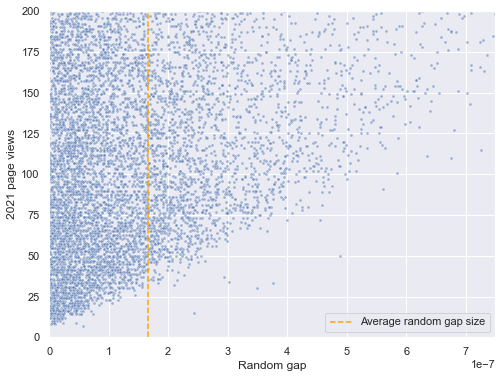

In [12]:
fig, ax = plt.subplots()
#ax.set_yscale('log')
sns.scatterplot(data=df, x='gap', y='total', alpha=.5, ax=ax, marker='.')
ax.set_ylim(0, 200)
#ax.set_ylim(0, 100000)
ax.set_xlim(0, 
            #1e-6,
            7.5e-7,
           )
ax.vlines(1.67e-7, 0, 200, label="Average random gap size", color='orange', linestyles='--')
plt.legend()
ax.set_xlabel("Random gap")
ax.set_ylabel("2021 page views")
savefig("gap_vs_views_zoomed.png")
#ax.set_yscale('log');

In [63]:
df.gap.describe(percentiles=[.01, .05, .1, .2, .5, .9, .95, .98, .99, .995])

count    2.928400e+04
mean     1.625466e-07
std      1.627326e-07
min      0.000000e+00
1%       1.401490e-09
5%       7.921200e-09
10%      1.667070e-08
20%      3.545280e-08
50%      1.132793e-07
90%      3.737489e-07
95%      4.886955e-07
98%      6.350505e-07
99%      7.465726e-07
99.5%    8.698185e-07
max      1.715519e-06
Name: gap, dtype: float64

In [11]:
nd.head()

,page_id,page_title,page_random,pp_propname,gap,1,2,3,4,5,6,7,8,9,10,11,12,total,dab
0,28448998,"Korita,_Tomislavgrad",0.500000,NaN,NaN,6.0,0.0,3.0,1.0,12.0,1.0,4.0,4.0,3.0,6.0,12.0,7.0,59,False
1,31575239,Larry_Douglas_(American_football),0.500000,NaN,2.776510e-07,35.0,32.0,20.0,21.0,25.0,27.0,20.0,31.0,13.0,35.0,39.0,35.0,333,False
3,4895341,MSN_Chat,0.500001,NaN,1.651280e-07,1462.0,988.0,1251.0,793.0,748.0,738.0,695.0,726.0,773.0,829.0,519.0,634.0,10156,False
4,30992386,NAMA_(gene),0.500001,NaN,3.481600e-08,8.0,5.0,14.0,2.0,3.0,11.0,5.0,5.0,11.0,6.0,18.0,7.0,95,False
5,48711187,Paola_Musiani,0.500001,NaN,3.197000e-09,29.0,24.0,31.0,19.0,28.0,26.0,29.0,28.0,32.0,13.0,35.0,39.0,333,False


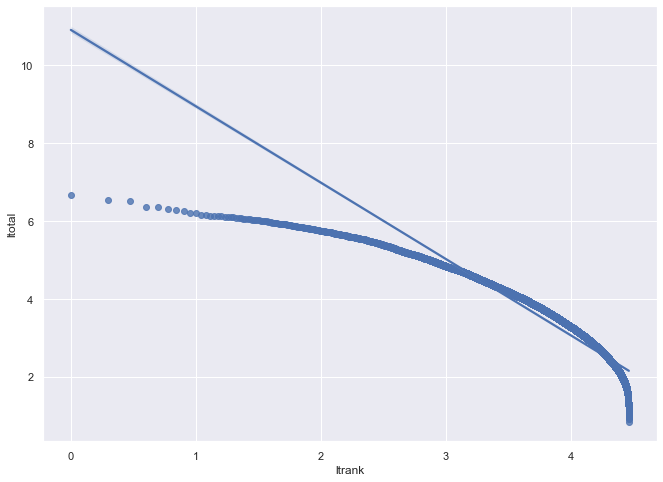

In [66]:
# For some reason trying to use a log scale more directly is giving janky results, so whatever.
def zipf_plot(df, marker=None):
    d = df.copy()
    d['ltrank'] = np.log10(d.total.rank(ascending=False, method='first'))
    d['ltotal'] = np.log10(d.total)
    f, ax = plt.subplots()
    sns.regplot(x='ltrank', y='ltotal', data=d,
                 ax=ax,
                 marker=marker,
                )
    return ax

zipf_plot(
    nd,
    #nd.sample(1000, random_state=1),
    #marker='o',
);

In [45]:
nd.sample(100, random_state=1).total.rank(ascending=False).sort_values()

30498      1.0
2330       2.0
17060      3.0
5571       4.0
28652      5.0
         ...  
19878     96.0
23966     97.5
19058     97.5
15095     99.0
30065    100.0
Name: total, Length: 100, dtype: float64

<AxesSubplot:>

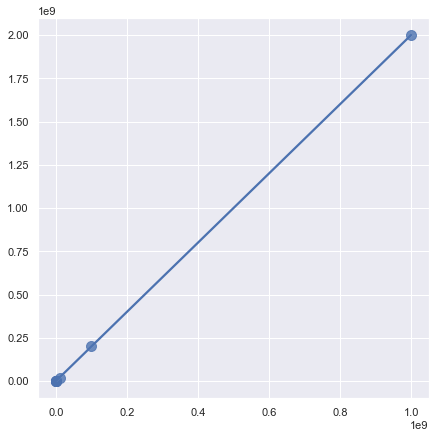

In [25]:
import numpy as np

x = 10 ** np.arange(1, 10)
y = x * 2
data = pd.DataFrame(data={'x': x, 'y': y})

f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")
sns.regplot(x=x, y=y, ax=ax, scatter_kws={"s": 100})

In [14]:
df.total.describe()

count    3.088200e+04
mean     1.254067e+04
std      7.662463e+04
min      3.000000e+00
25%      1.990000e+02
50%      7.320000e+02
75%      3.461000e+03
max      4.525873e+06
Name: total, dtype: float64

In [16]:
df.sort_values(by='total', ascending=False).head()

,page_id,page_title,page_random,pp_propname,gap,1,2,3,4,5,6,7,8,9,10,11,12,total,dab
3235,444222,Narendra_Modi,0.500506,NaN,8.900600e-08,421757.0,368405.0,430324.0,449893.0,533994.0,313632.0,355167.0,312590.0,436826.0,298020.0,286203.0,319062.0,4525873,False
23467,160811,"Camilla,_Duchess_of_Cornwall",0.503622,NaN,4.284054e-07,531010.0,260029.0,617367.0,644946.0,270019.0,159279.0,146625.0,133987.0,112128.0,190333.0,201382.0,113159.0,3380264,False
3084,1673570,Fran_Lebowitz,0.500484,NaN,1.399530e-07,1847440.0,558102.0,176619.0,176811.0,110183.0,70783.0,86361.0,51539.0,46660.0,41129.0,39076.0,89240.0,3293943,False
20169,298602,Leicester_City_F.C.,0.503114,NaN,2.040650e-07,152178.0,139892.0,142495.0,189552.0,546997.0,129279.0,176643.0,262764.0,141083.0,163397.0,116602.0,134698.0,2295580,False
29630,30770,The_Troubles,0.504566,NaN,1.508743e-07,234381.0,189585.0,244212.0,275068.0,198775.0,145138.0,149654.0,148664.0,155160.0,157963.0,188652.0,172382.0,2259634,False
